In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import cv2
import os

from spectral import *

from os.path import exists

from sklearn.decomposition import PCA

from skimage.segmentation import slic, mark_boundaries

from sklearn.cluster import KMeans

In [2]:
data = plt.imread("data/phone/sardi_setup_1_phone.jpeg")

In [3]:
data.shape

(4032, 3024, 3)

In [4]:
# transform into a line of pixels for PCA
X = data.copy().reshape(data.shape[0]*data.shape[1],data.shape[2])

In [5]:
print(X.shape)

(12192768, 3)


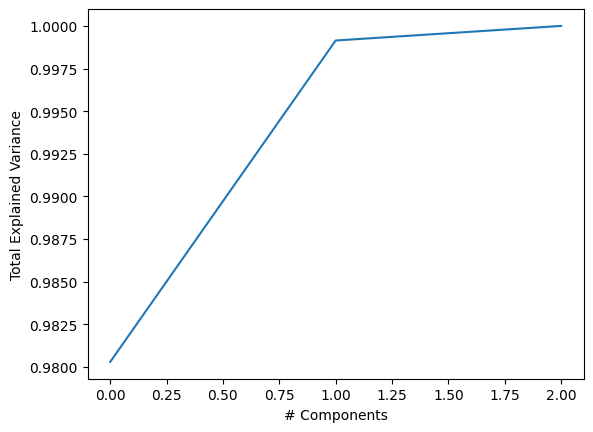

In [7]:
run = True
if run:
    pca = PCA()

    # fit my data, and transform
    pcX = pca.fit_transform(X)

    # graph the variance of each component (should give a good idea about the number of components to use).
    ev = pca.explained_variance_ratio_
    cumulativeVar = np.cumsum(ev)
    
    plt.plot(cumulativeVar)
    plt.xlabel('# Components')
    plt.ylabel('Total Explained Variance')
    plt.show()

Now to actually perform the PCA.

In [8]:
# pick number of components that seems reasonable.
nComp = 3 # between 85-90% of the variance
pca = PCA(n_components=nComp)
pca.fit(X)
pcX = pca.transform(X)

In [9]:
# check the new dimensions
print(pcX.shape)

(12192768, 3)


In [10]:
# reformat the image into the original shape
image_pca = pcX.reshape(data.shape[0], data.shape[1], pcX.shape[1])
print(image_pca.shape)

(4032, 3024, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


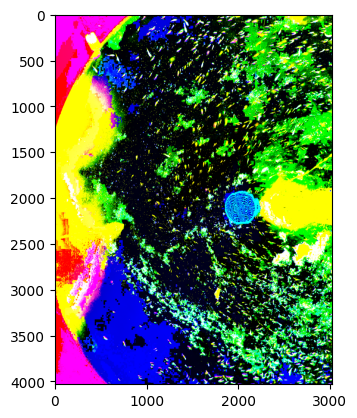

In [11]:
# let's have a look at the reduced image, if using 3 components
if image_pca.shape[2] == 3:
    plt.imshow(image_pca, 'gray')

## K-means elbow method to determine optimal n_clusters

In [12]:
# Only running this once to prove a point, it takes too long.
run = True
if run:
    inertia = {}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k).fit(pcX)
        inertia[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(inertia.keys()), list(inertia.values()))
    plt.xlabel("# Clusters")
    plt.ylabel("SSE")
    plt.show()

/home/solomon/.pyenv/versions/3.8.16/envs/openhsi/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

## Classification

In [13]:
# create our classifier
k_means = KMeans(n_clusters=5) # based on elbow method above, going to stick to this number

In [14]:
# classify
k_fit = k_means.fit(pcX)

/home/solomon/.pyenv/versions/3.8.16/envs/openhsi/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# capture clusers and labels
x_labels = k_means.labels_
x_cluster = x_labels.reshape(image_pca[:, :, 0].shape)

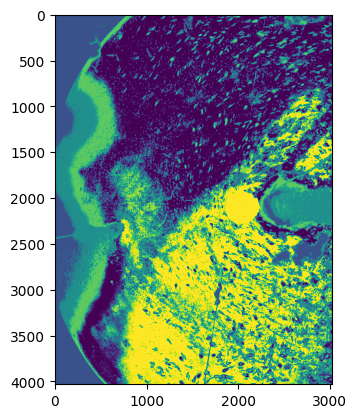

In [16]:
plt.imshow(x_cluster)